## Exercise 2

In the second exercise you need to plot ocean depth against ocean age. You have the topography / bathymetry data and the age data. You should do this for the "deep oceans" to avoid including the continental shelves and, for that matter, the continents.


In [1]:
%pylab inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from osgeo import gdal

Populating the interactive namespace from numpy and matplotlib


In [46]:
from scipy.misc import imresize

etopoH = gdal.Open("../Mapping/Resources/ETOPO1_Ice_c_geotiff.tif") 
etopoH_img = etopoH.ReadAsArray()[::4,::4]
del(etopoH)

ages = np.load("../Mapping/Resources/global_age_data.3.6.z.npz")["ageData"]

etopoH_1 = imresize(etopoH_img, ages.shape, interp='bilinear', mode="F")
etopoH_1[ np.isnan(ages) ] = np.nan


## Task

Make and image plot of etopoH_1 and ages (check they are the same shape and same mask)

In [ ]:
## Code here 

### Task

Make a scatter plot of the depth against age. You might need to downsample the number of points as there are a lot of them:

```python 
ages_decimated = ages[::10]
ages_decimated = etopoH[::10]
``` 

Do you see any systematic trend ?

In [ ]:
## Code here 

In [56]:
# Now try interpolating the bathymetry to a smoothed / downsampled version of the ages.

ages_reduced = ages[::8,::8] # Try different values

### Task

Make a scatterplot with this data too. 

Does smoothing help bring out a trend ?

You should be able to use 

```python
import scipy.optimize.curve_fit as curve_fit
help(curve_fit)
```

To see if you can fit $ \textrm{depth} = A + B\sqrt{\textrm{age}} $



In [30]:
## Your code here 

(0, 120)

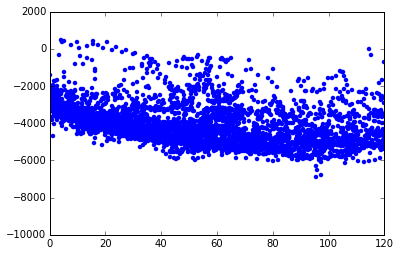

In [51]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)

ax1.scatter(ages2[::10], etopoH_resized[::10], linewidth=0.0)
ax1.set_xlim(0, 120)


In [60]:
from scipy.optimize import curve_fit

def sqrtage(age, A, B):
    return ( A + B * sqrt(age))


valid_ages = ages_reduced[ np.where(isnan(ages_reduced) == False) ]
# valid_depths = 

etopoH_2 = imresize(etopoH_img, ages_reduced.shape, interp='bilinear', mode="F")
valid_depths = etopoH_2[ np.where(isnan(ages_reduced) == False) ]    
popt, pcov = curve_fit(sqrtage, valid_ages, valid_depths)    


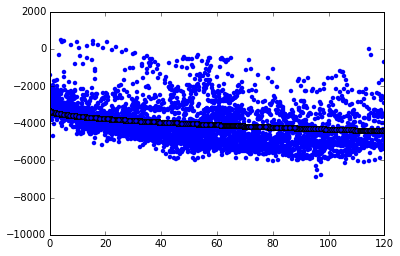

In [62]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)

ax1.scatter(ages2[::10], etopoH_resized[::10], linewidth=0.0)
ax1.set_xlim(0, 120)
ax1.scatter(valid_ages, popt[0] + popt[1] * np.sqrt(valid_ages))

Actually, the other reason this doesn't work very well is that it fails to account for sediment thickness on the ocean floor